In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedKFold
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.utils import shuffle
from sklearn.model_selection import GridSearchCV
from numpy import absolute
from numpy import mean, std
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('training.csv')
df.drop(columns = ['Unnamed: 0'], inplace = True)
df

,High(t-4),Low(t-4),Close_x(t-4),Close_y(t-4),reddit_sentiment(t-4),twitter_sentiment(t-4),High(t-3),Low(t-3),Close_x(t-3),Close_y(t-3),...,Low(t),Close_x(t),Close_y(t),reddit_sentiment(t),twitter_sentiment(t),roe,debtToEquity,ev/ebitda,eps,Close_x1(t+1)
0,41.357375,37.129121,41.258595,2724.870117,0.000000,0.137917,42.299388,40.576765,40.820099,2709.800049,...,41.793638,42.548553,2792.810059,0.000000,0.345201,0.109210,2.230663,4.457843,1.050,43.286526
1,42.299388,40.576765,40.820099,2709.800049,0.000000,0.262374,41.733154,40.983082,41.234718,2775.600098,...,41.012109,43.286526,2783.300049,0.000000,0.213995,0.109210,2.230663,4.457843,1.050,45.493206
2,41.733154,40.983082,41.234718,2775.600098,0.000000,0.291613,42.553395,41.009697,42.156582,2796.110107,...,43.400255,45.493206,2832.939941,0.000000,0.283504,0.109210,2.230663,4.457843,1.050,45.667412
3,42.553395,41.009697,42.156582,2796.110107,0.000000,0.280743,43.008275,41.793638,42.548553,2792.810059,...,44.697152,45.667412,2798.360107,0.000000,0.259652,0.109210,2.230663,4.457843,1.050,46.272305
4,43.008275,41.793638,42.548553,2792.810059,0.000000,0.345201,43.339757,41.012109,43.286526,2783.300049,...,44.660854,46.272305,2867.189941,0.000000,0.213035,0.109210,2.230663,4.457843,1.050,48.416069
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,156.999444,143.671940,152.852661,3871.979980,0.090577,0.226419,154.955949,133.952921,138.478485,3806.800049,...,143.161422,144.000137,3963.939941,0.000000,0.086957,0.504836,5.282353,3.744930,1.272,146.406464
196,154.955949,133.952921,138.478485,3806.800049,0.000000,0.140308,150.050891,134.384808,148.053940,3957.250000,...,140.136039,146.406464,3998.840088,0.152096,0.064787,0.528813,5.112557,2.692085,1.290,144.269730
197,150.050891,134.384808,148.053940,3957.250000,0.000000,0.239292,153.355842,145.927183,147.784348,3949.939941,...,139.786569,144.269730,3990.560059,0.158785,0.141762,0.528813,5.112557,2.692085,1.290,132.168198
198,153.355842,145.927183,147.784348,3949.939941,0.000000,0.125853,151.598536,143.161422,144.000137,3963.939941,...,131.119811,132.168198,3817.659912,0.000000,0.124669,0.528813,5.112557,2.692085,1.290,131.658981


In [3]:
col_order = ['High(t-4)', 'High(t-3)', 'High(t-2)', 'High(t-1)', 'High(t)', 'Low(t-4)', 'Low(t-3)','Low(t-2)',
            'Low(t-1)', 'Low(t)', 'Close_x(t-4)', 'Close_x(t-3)', 'Close_x(t-2)', 'Close_x(t-1)', 'Close_x(t)',
            'Close_y(t-4)', 'Close_y(t-3)', 'Close_y(t-2)', 'Close_y(t-1)', 'Close_y(t)', 'reddit_sentiment(t-4)',
            'reddit_sentiment(t-3)', 'reddit_sentiment(t-2)', 'reddit_sentiment(t-1)', 'reddit_sentiment(t)',
            'twitter_sentiment(t-4)', 'twitter_sentiment(t-3)', 'twitter_sentiment(t-2)', 'twitter_sentiment(t-1)',
            'twitter_sentiment(t)', 'roe', 'debtToEquity', 'ev/ebitda', 'eps', 'Close_x1(t+1)']

In [4]:
df = df[col_order]

In [5]:
train_scaled = df.copy()
trform_list = {}

In [6]:
def minmaxscaler(index, row, in_size, num_var):
    trform_dict = {}
    trformed_row = []
    value = 0
    for i in range(num_var):
        cur = np.array(row[ i*in_size : (i+1)*in_size ])
        rowmaxmin = cur.max() - cur.min()
        print('rowmaxmin', rowmaxmin)
        rowmin = cur.min()
        print('rowmin', rowmin)
        trform_dict[i] = [rowmaxmin, rowmin]
        trform_list[index] = trform_dict
        cur = [ (x - rowmin) / (rowmaxmin) for x in cur]
        trformed_row.extend(cur)
        if (i == 2):
            target = row[-1]
            value = (target - rowmin) / rowmaxmin
    
    rest = np.array(row[ num_var*in_size : -1 ])
    trformed_row.extend(rest)
    trformed_row.append(value)
    return trformed_row
            

In [7]:
for index, row in train_scaled.iterrows():
    trformed_row = minmaxscaler(index, row, 5, 4)
    train_scaled.loc[index] = trformed_row

rowmaxmin 1.6508996621856014
rowmin 41.35737509596889
rowmaxmin 4.664516461837827
rowmin 37.12912131720494
rowmaxmin 1.728454589843757
rowmin 40.820098876953125
rowmaxmin 86.31005859375
rowmin 2709.800048828125
rowmaxmin 1.6066030083946998
rowmin 41.73315406965472
rowmaxmin 1.2168728890840015
rowmin 40.57676488995877
rowmaxmin 2.4664268493652344
rowmin 40.820098876953125
rowmaxmin 86.31005859375
rowmin 2709.800048828125
rowmaxmin 3.8495757483225646
rowmin 41.73315406965472
rowmaxmin 2.4171728787086195
rowmin 40.98308218455416
rowmaxmin 4.2584877014160085
rowmin 41.23471832275391
rowmaxmin 57.33984375
rowmin 2775.60009765625
rowmaxmin 5.279552263537468
rowmin 42.55339511545279
rowmaxmin 3.6874556125854525
rowmin 41.0096967766733
rowmaxmin 3.5108299255371094
rowmin 42.15658187866211
rowmaxmin 49.639892578125
rowmin 2783.300048828125
rowmaxmin 4.824672620835763
rowmin 43.00827475815449
rowmaxmin 3.685043049241912
rowmin 41.01210934001684
rowmaxmin 3.7237510681152273
rowmin 42.548553466796

In [8]:
trform_list

{0: {0: [1.6508996621856014, 41.35737509596889],
  1: [4.664516461837827, 37.12912131720494],
  2: [1.728454589843757, 40.820098876953125],
  3: [86.31005859375, 2709.800048828125]},
 1: {0: [1.6066030083946998, 41.73315406965472],
  1: [1.2168728890840015, 40.57676488995877],
  2: [2.4664268493652344, 40.820098876953125],
  3: [86.31005859375, 2709.800048828125]},
 2: {0: [3.8495757483225646, 41.73315406965472],
  1: [2.4171728787086195, 40.98308218455416],
  2: [4.2584877014160085, 41.23471832275391],
  3: [57.33984375, 2775.60009765625]},
 3: {0: [5.279552263537468, 42.55339511545279],
  1: [3.6874556125854525, 41.0096967766733],
  2: [3.5108299255371094, 42.15658187866211],
  3: [49.639892578125, 2783.300048828125]},
 4: {0: [4.824672620835763, 43.00827475815449],
  1: [3.685043049241912, 41.01210934001684],
  2: [3.7237510681152273, 42.54855346679688],
  3: [83.889892578125, 2783.300048828125]},
 5: {0: [5.10776415869946, 43.339757078049416],
  1: [5.214226761622228, 41.0121093400

In [9]:
train_scaled.head()

,High(t-4),High(t-3),High(t-2),High(t-1),High(t),Low(t-4),Low(t-3),Low(t-2),Low(t-1),Low(t),...,twitter_sentiment(t-4),twitter_sentiment(t-3),twitter_sentiment(t-2),twitter_sentiment(t-1),twitter_sentiment(t),roe,debtToEquity,ev/ebitda,eps,Close_x1(t+1)
0,0.000000,0.570606,0.227621,0.724466,1.000000,0.000000,0.739121,0.826229,0.831935,1.000000,...,0.137917,0.262374,0.291613,0.280743,0.345201,0.10921,2.230663,4.457843,1.05,1.426955
1,0.352442,0.000000,0.510544,0.793675,1.000000,0.000000,0.333903,0.355774,1.000000,0.357757,...,0.262374,0.291613,0.280743,0.345201,0.213995,0.10921,2.230663,4.457843,1.05,1.894687
2,0.000000,0.213073,0.331237,0.417345,1.000000,0.000000,0.011011,0.335332,0.012009,1.000000,...,0.291613,0.280743,0.345201,0.213995,0.283504,0.10921,2.230663,4.457843,1.05,1.040908
3,0.000000,0.086159,0.148945,0.573786,1.000000,0.000000,0.212597,0.000654,0.648295,1.000000,...,0.280743,0.345201,0.213995,0.283504,0.259652,0.10921,2.230663,4.457843,1.05,1.172293
4,0.000000,0.068706,0.533602,1.000000,0.758775,0.212081,0.000000,0.648065,1.000000,0.990150,...,0.345201,0.213995,0.283504,0.259652,0.213035,0.10921,2.230663,4.457843,1.05,1.575700


In [10]:
x = train_scaled.drop("Close_x1(t+1)", axis=1)
y = train_scaled["Close_x1(t+1)"]

In [11]:
# Take last 50 days as test data
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=88, shuffle=False)

In [12]:
# Shuffle the first 150 days as train data
X_train, y_train = shuffle(X_train, y_train, random_state=0)

In [13]:
ab_performance_tracker = pd.DataFrame(columns=["MAE", "MSE", "RMSE", "R2"])

In [14]:
param_grid = {
    'alpha': [0.01, 0.1, 1.0, 10.0],
    'l1_ratio': [0.1, 0.3, 0.5, 0.7, 0.9],
    'max_iter': [1000, 5000, 10000],
    'tol': [1e-3, 1e-4, 1e-5]
}

In [15]:
elastic_net = ElasticNet()
grid_search = GridSearchCV(estimator=elastic_net, param_grid=param_grid, cv=5, n_jobs = -1)
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_params

{'alpha': 0.1, 'l1_ratio': 0.5, 'max_iter': 1000, 'tol': 1e-05}

In [16]:
enet = enet = ElasticNet(alpha = 0.1, l1_ratio = 0.5, max_iter = 1000, tol = 1e-5).fit(X_train, y_train)
y_pred = enet.predict(X_test)

pred_trformed = [y_pred[x-150] * trform_list[x][2][0] + trform_list[x][2][1] for x in y_test.index]
y_trformed =  [y_test[x] * trform_list[x][2][0] + trform_list[x][2][1] for x in y_test.index]

mae = mean_absolute_error(y_trformed, pred_trformed)
mse = mean_squared_error(y_trformed, pred_trformed)
rmse = mean_squared_error(y_trformed, pred_trformed, squared=False)
r2 = r2_score(y_trformed, pred_trformed)
    
print('Mean Absolute Error:', mae)
print('Mean Squared Error:', mse)
print('Root Mean Squared Error:', rmse)
print('R-squared:', r2)    

Mean Absolute Error: 7.698716577046167
Mean Squared Error: 78.84583856892533
Root Mean Squared Error: 8.879517924354076
R-squared: 0.49649318015652144


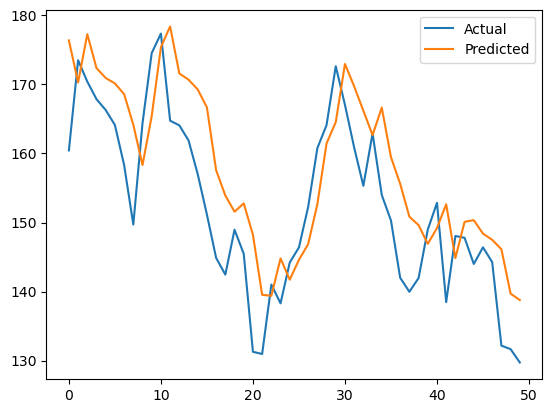

In [17]:
plt.plot(y_trformed, label='Actual')
plt.plot(pred_trformed, label='Predicted')
plt.legend()
plt.show()